Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
1/1 [==============================] - 0s 166ms/step


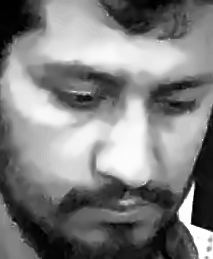

Label Options:
1. anger (0)
2. disgust (0)
3. fear (0)
4. happiness (0)
5. neutral (0)
6. sadness (0)
7. surprise (0)
Enter the label number for this face (1-7) or 's' to skip: 6
2/2 [==============================] - 0s 10ms/step


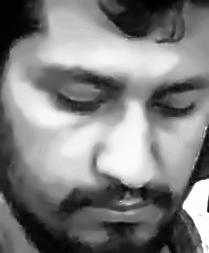

Label Options:
1. anger (0)
2. disgust (0)
3. fear (0)
4. happiness (0)
5. neutral (0)
6. sadness (1)
7. surprise (0)


KeyboardInterrupt: ignored

In [ ]:
import os
import cv2
import numpy as np
!pip install mtcnn
from mtcnn import MTCNN
from google.colab.patches import cv2_imshow

# Pre-trained fer_label
fer_label = ["anger", "disgust", "fear", "happiness", "neutral", "sadness", "surprise"]

# Create output folders and subfolders
output_folder = "/content/drive/MyDrive/output_labeling"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
for label in fer_label:
    subfolder_path = os.path.join(output_folder, label)
    if not os.path.exists(subfolder_path):
        os.makedirs(subfolder_path)

# Initialize MTCNN for face detection
mtcnn = MTCNN()

# Assign numbers to fer_label
label_numbers = {label: i for i, label in enumerate(fer_label)}


# User-defined labeling function
def user_labeling(face):
    # Display the face
    cv2_imshow(face)

    # Display label options
    print("Label Options:")
    for i, label in enumerate(fer_label):
        count = assigned_labels.count(label)
        label_with_count = f"{i+1}. {label} ({count})"
        print(label_with_count)

    # Ask for the label number or skip option
    label_num = input(f"Enter the label number for this face (1-{len(fer_label)}) or 's' to skip: ").strip()

    # Check if the input is valid or skip option is selected
    if label_num == 's':
        return None

    if label_num.isdigit() and int(label_num) in range(1, len(fer_label) + 1):
        index = int(label_num) - 1
        label = fer_label[index]
        return label

    # Invalid input, ask again
    print("Invalid label number. Please try again.")
    return user_labeling(face)


# Initialize video capture
cap = cv2.VideoCapture("/content/drive/MyDrive/Classroom_Videos/class10.mp4")


# Initialize lists for detected faces and assigned labels
detected_faces = []
assigned_labels = []

# Initialize variables for frame counting
frame_count = 0
selected_frame_count = 0

# Process video frames
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Check if the frame is empty
    if frame is None:
        print("Empty frame encountered. Skipping...")
        continue

    # Convert frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Perform face detection every 10 seconds
    if frame_count % 100 == 0:
        # Perform face detection
        results = mtcnn.detect_faces(frame)

        # Iterate over detected faces
        for result in results:
            x, y, width, height = result['box']
            face = gray[y:y + height, x:x + width]

            # Denoise the face using Non-Local Means Denoising (NLMeans)
            denoised_face = cv2.fastNlMeansDenoising(face)

            # Enhance the denoised face using histogram equalization
            enhanced_face = cv2.equalizeHist(denoised_face)

            # User-defined labeling
            label = user_labeling(enhanced_face)

            # Skip if None (skip option selected)
            if label is None:
                continue

            # Resize the face to 224x224
            resized_face = cv2.resize(enhanced_face, (224, 224))

            # Generates a random 5-digit number
            random_num = str(np.random.randint(10000, 99999))

            # Save face with selected label
            output_path = os.path.join(output_folder, label, f"{label}_{len(detected_faces)}_{random_num}.jpg")
            cv2.imwrite(output_path, resized_face)

            detected_faces.append(resized_face)
            assigned_labels.append(label)

    # Increment frame counters
    frame_count += 1
    selected_frame_count += 1

    # Press 'q' to stop the video processing
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture and destroy windows
cap.release()
cv2.destroyAllWindows()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
